In [12]:
# Modules
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail as scd


# Functions
# Input 'fullname' argument as a string of player's full name
def player_info(fullname):
    player_dict = players.get_players()
    for player in player_dict:
        if player['full_name'] == fullname:
            return(player)


# Input 'teamname' argument as a string of full team name
def team_info(teamname):
    nba_teams = teams.get_teams()
    for team in nba_teams:
        if team['full_name'] == teamname:
            return(team)


def clean_df(df):
    df = df.drop_duplicates()
    df.dropna(inplace=True)
    clean_df = df[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'SHOT_ZONE_BASIC',
                   'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
                   'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'GAME_DATE']]
    clean_df = clean_df.rename(columns={'PLAYER_ID': 'id','PLAYER_NAME': 'name', 'TEAM_ID': 'team_id', 'TEAM_NAME': 'team_name',
                                        'SHOT_ZONE_BASIC': 'shot_zone_basic','SHOT_ZONE_AREA': 'shot_zone_area', 
                                        'SHOT_ZONE_RANGE': 'shot_zone_range', 'SHOT_DISTANCE': 'shot_distance', 
                                        'LOC_X': 'x', 'LOC_Y': 'y', 'SHOT_MADE_FLAG': 'shot_made', 'GAME_DATE': 'game_date'})
    return(clean_df)

# function to separate dataframe by years
# Since nba seasons start in one year and end in the next, had to include 'year + 1'
# The NBA regular season usually starts in October and ends by May
def separate_year_charts(year):
    chart_by_year = shotchart_df[(shotchart_df['game_date'] > (str(year) + '1001')) &
                             (shotchart_df['game_date'] < (str(year + 1) + '0531'))]
    return(chart_by_year)


# inputs to run functions
fullname = input("Please input the full name of the player: ")
teamname = input("Please input the full name of this player's current team: ")
year = input("Please input start year for NBA season: ")

# assign variables to return values 
player = player_info(fullname.title())
team = team_info(teamname.title())

stats = scd.ShotChartDetail(player_id=player['id'],
                            team_id=team['id'], context_measure_simple="FGA")
shots_df = stats.get_data_frames()[0]

shotchart_df = clean_df(shots_df)
shotchart = separate_year_charts(int(year))
shotchart

Please input the full name of the player: Giannis Antetokounmpo
Please input the full name of this player's current team: Milwaukee Bucks
Please input start year for NBA season: 2015


,id,name,team_id,team_name,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,x,y,shot_made,game_date
1198,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,0,-7,-1,1,20151030
1199,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,0,-7,2,1,20151030
1200,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Above the Break 3,Left Side Center(LC),24+ ft.,27,-233,144,0,20151030
1201,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,1,-16,2,1,20151030
1202,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,20151030
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Above the Break 3,Center(C),24+ ft.,27,-9,273,1,20160413
2205,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,0,-7,7,0,20160413
2206,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,20160413
2207,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-25,56,1,20160413


In [11]:
# Confirming that we have the correct # of shots for the yr
shotchart_15 = shotchart
shotchart_15.shape

(1011, 12)

In [13]:
# The function to create the half of the nba court
# This code came from: http://savvastjortjoglou.com/nba-shot-sharts.html
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create hoop
    # Diameter of a hoop is 18", radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc] #, #center_outer_arc,
                      #center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

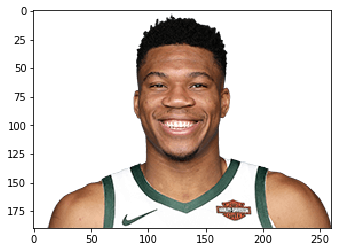

In [14]:
# Followed the example provided in http://savvastjortjoglou.com/nba-shot-sharts.html
# Was able to retrieve image of our superstar Giannis Antetokounmpo
import urllib.request
from matplotlib.offsetbox import  OffsetImage
# pass in the link to the image
pic = urllib.request.urlretrieve("https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612749/2019/260x190/203507.png")

# urlretrieve returns a tuple with our image as the first 
giannis = plt.imread(pic[0])

# plot the image
plt.imshow(giannis)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [15]:
# after much experimentation, landed on these visual parameters 
def visual7(df):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, xlim=(-250,250), ylim=(-47.5, 422.5))

    plt.tick_params(labelbottom=False, labelleft=False)
    
    # after creating ax we can draw the court
    # draw_court function came from: http://savvastjortjoglou.com/nba-shot-sharts.html
    draw_court()
    makes, = ax.plot([], [], 'o', markersize=5, fillstyle = 'none')
    misses, = ax.plot([], [], 'o', markersize=5, fillstyle = 'none')

    # adding giannis's face to chart
    img = OffsetImage(giannis, zoom=0.2)
    img.set_offset((399, 395))
    ax.add_artist(img)

    make = df[(df.shot_made==1)][['x', 'y']]
    miss = df[(df.shot_made==0)][['x', 'y']]
    # update markers for makes
    makes.set_data(make.x.values, make.y.values)
    # makes.set_markerfacecolor
    makes.set_markeredgewidth(1)
    makes.set_markeredgecolor('green')
    makes.set_alpha(0.9)
    # update markers for misses
    misses.set_data(miss.x.values, miss.y.values)
    misses.set_markeredgecolor('tan')
    misses.set_markeredgewidth(1)
    misses.set_alpha(0.9)
    
    # legend
    make = mpatches.Patch(color='green', label='Make')
    miss = mpatches.Patch(color='tan', label='Miss')
    plt.legend(handles = [make, miss], loc = 'center', bbox_to_anchor=(.925, .83), frameon = False)
    plt.rcParams["legend.fontsize"] = 9
    # title
    ax.set_title('Giannis Antetokounmpo \n2015-16 Reg.Season FGA Shot Chart', y=1.01, fontsize= 12)
    plt.savefig('GA15.png')

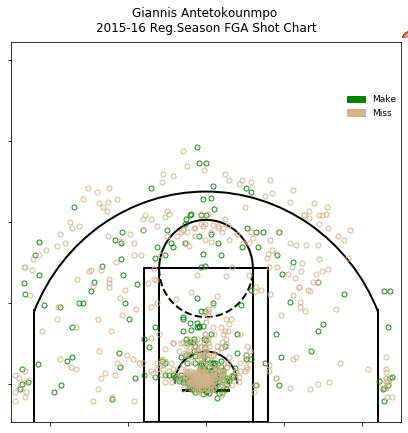

In [16]:
visual7(shotchart_15)